# Surface Latent Heat Flux


Data was obtained from the Copernicus Climate Data Store (CDS), specifically the CMIP5 monthly data on single levels form which can be found here:
https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip5-monthly-single-levels?tab=form
User Details:
UID67774
API Keyb57fc16c-805e-4bc3-93b5-fa9377b97a28

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import plotly
%matplotlib inline
%conda install -c conda-forge cfgrib
%conda install cdsapi
import matplotlib.pyplot as plt
import cfgrib
import cdsapi
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import ipywidgets as widgets
from IPython.display import Image


Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cfgrib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-20.3.0               |     pyhd3deb0d_0          41 KB  conda-forge
    c-ares-1.17.1              |       h36c2ea0_0         111 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py38h578d9bd_0         143 KB  conda-forge
    cfgrib-0.9.8.5             |     pyhd8ed1ab_0          42 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    curl-7.71.1                |       he644dc0_8         139 KB  conda-forge
    eccodes-2.19.1             |       ha0e6eb6_0         4.0 MB  conda-forge
    hdf4-4.2.13                |    h10796ff_1004         951 KB  conda-forge
    hdf5-1.10.6                

# So what is Surface Latent Heat Flux?
When the suns energy is reaches the earth, some energy is reflected, absorbed by the clouds or absorbed by the surface. Surface Latent Heat deals with the part that is absorbed by the surface. Latent heat flux is essentially the amount of energy moving from surface to air or from the air to the surface (whether the surface is land or ocean). Negative values are associated with air to surface, Positive values are associated with surface to air.


# Global Surface Latent Heat Flux by time and date
Below you will see the code and graphs for:
* Global SLHF from the time period 1850-1950's (day and night)
* Global SLHF from the time period 1950-2010's
* Some sample graphs featuring cdsapi's capabilities


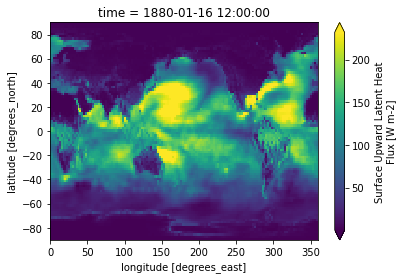

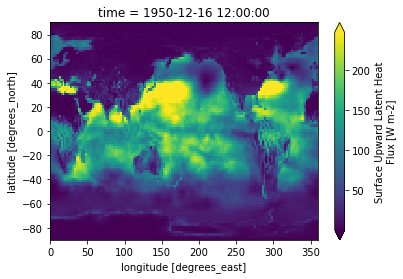

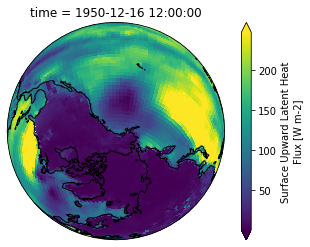

interactive(children=(Dropdown(description='Date:', options=(cftime.DatetimeNoLeap(1880, 1, 16, 12, 0, 0, 0), …

In [2]:

dset = xr.open_dataset('hfls_Amon_GISS-E2-R_amip_r1i1p1_188001-195012.nc')
lons = dset.variables['lon_bnds'][:]
lats = dset.variables['lat_bnds'][:]
time = dset.variables['time_bnds'][:]
dset['hfls'].isel(time=0).plot(robust=True)
plt.show()
dset['hfls'].isel(time=851).plot(robust=True)
plt.show()
#37.8715° N, 122.2730° W berkeley

ax = plt.axes(projection=ccrs.Orthographic(37, 121.25))
ax.coastlines()
#some sample plots
p = dset['hfls'].isel(time=-1).plot(transform=ccrs.PlateCarree(), robust=True)
plt.show()

select_date = widgets.Dropdown(
    options=dset.time.values.tolist(),
    rows=2,
    description='Date:',
    disabled=False
)



def generate_plot1(date):
    
    fig = plt.figure(figsize=[12,5])

    # 111 means 1 row, 1 col and index 1
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
    
    dset['hfls'].sel(time=date).plot(cmap='jet', 
                                      transform=ccrs.PlateCarree(), robust = True)
    ax.coastlines(color='black', linewidth=2.)


interact_plot = widgets.interact(generate_plot1, date = select_date);

In [22]:
dset2 = xr.open_dataset('hfls_Amon_GISS-E2-R_amip_r1i1p1_195101-201012.nc')
select_date = widgets.Dropdown(
    options=dset2.time.values.tolist(),
    rows=2,
    description='Date:',
    disabled=False
)

def generate_plot(date):
    
    fig = plt.figure(figsize=[12,5])

    # 111 means 1 row, 1 col and index 1
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
    
    dset2['hfls'].sel(time=date).plot(cmap='jet', 
                                      transform=ccrs.PlateCarree(), robust = True)
    ax.coastlines(color='black', linewidth=2.)


interact_plot = widgets.interact(generate_plot, date = select_date);
                        

interactive(children=(Dropdown(description='Date:', options=(cftime.DatetimeNoLeap(1951, 1, 16, 12, 0, 0, 0), …

# So What Does It All Mean?
First we print the dataset, you will see it's source and dimensions
* hfls is the main variable used for creating the plots as it contains the time, latitude and longitude variables for plotting
* It is difficult to know what your dataset variables look like so it is useful to use Panoply to get a visual of your variablesand see what you want to graph
* Robust = True removes significant outliers which would mess up the color map and scale of the map. Significant sources of positive heat flux may come from hurricanes or storms which have been omitted
https://www.giss.nasa.gov/tools/panoply/


Notice during daytime (denoted 00:00:00) the Surface upward Latent Heat Flux is mostly positive, with the oceans a bright red. This simply represents the continous evaporation throughout the day

# Surface Latent Heat Flux and Sea Surface Temperature (SST)
* Air-->Sea energy transfers are important for balancing the climate
* ''At low (high) SST, LHF increases (decreases) with SST—a relationship that cannot be explained by thermodynamic considerations alone'' (American Meteorological Society)
* LHF is the energy used to cool down the ocean by evaporating water, which then heats up the the atmosphere (heat is released and condensed as clouds)

# Some more graphs

These graphs were made from the cdsclimate toolkit editor, it shows the monthly mean along with anomalies 
* from the artic graph from 1989-2009 there is a significant increase in the surface latent heat flux. In fact the artic has beenwarming up faster than other regions of the earth.
* take a look at how the SLHF takes on more positive values in the 2000's especially in the winter months!
* ''this warming of the ocean during the summer hinders the subsequent cold‐season growth of sea ice (e.g., Serreze et al., 2009; Screen & Simmonds, 2010a; Serreze & Barry, 2011; Stroeve et al., 2012) and results in a warming of the overlying atmosphere due to an upward flux of the heat deposited in the ocean.'' (Revisiting the Cause of the 1989–2009 Arctic Surface Warming Using the Surface Energy Budget: Downward Infrared Radiation Dominates the Surface Fluxes)

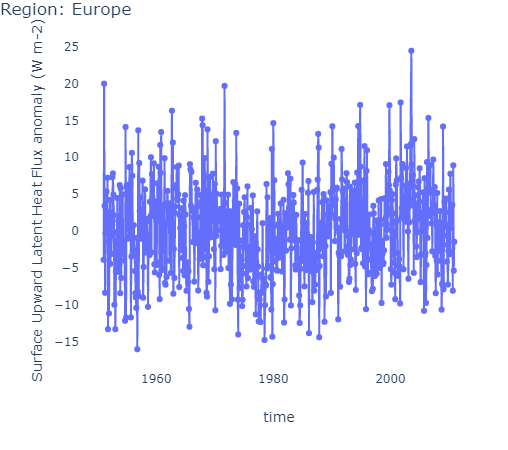


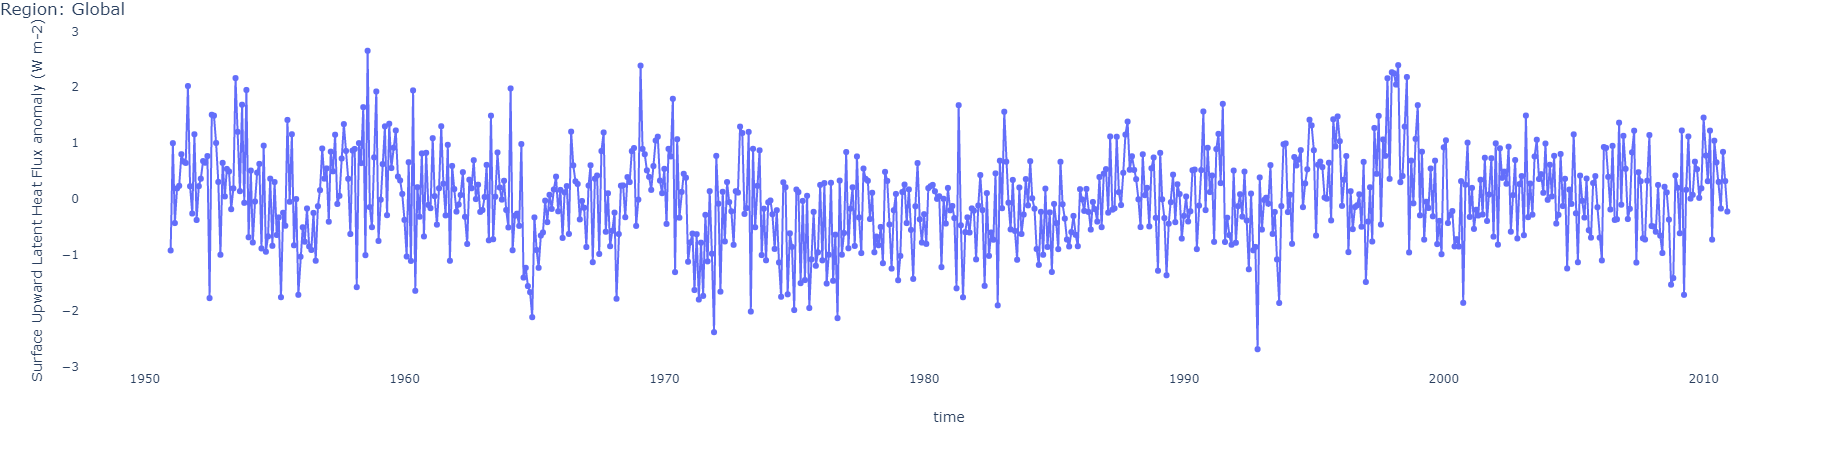

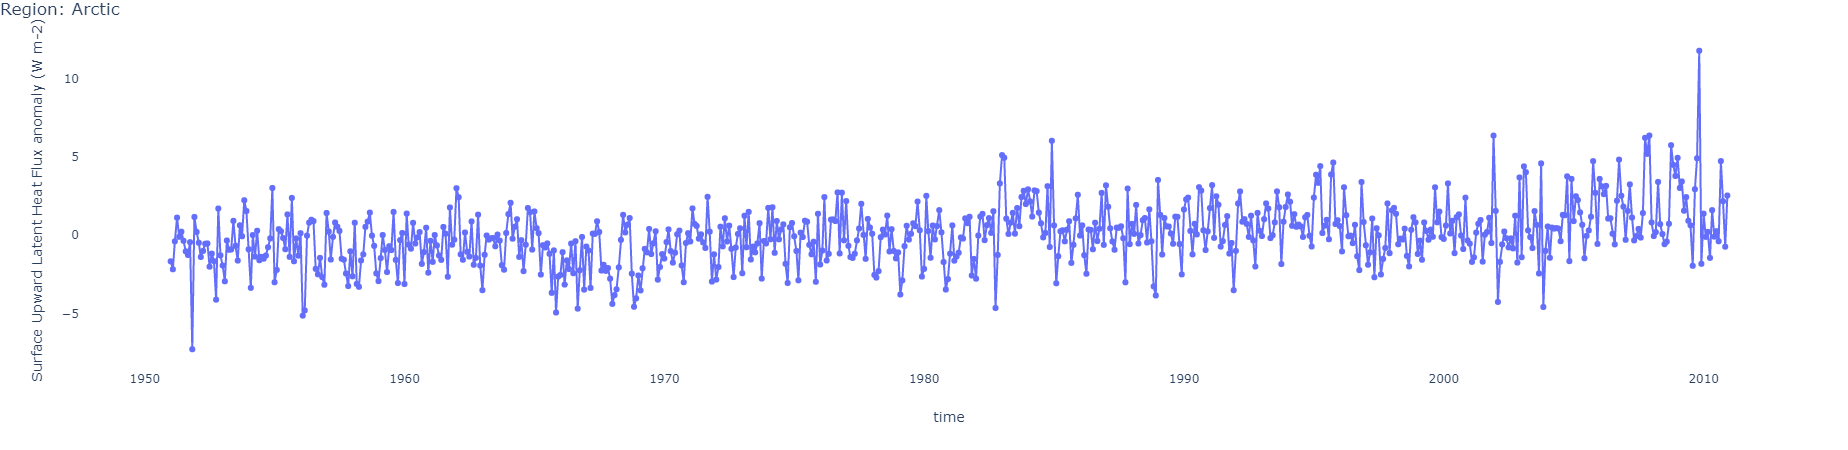

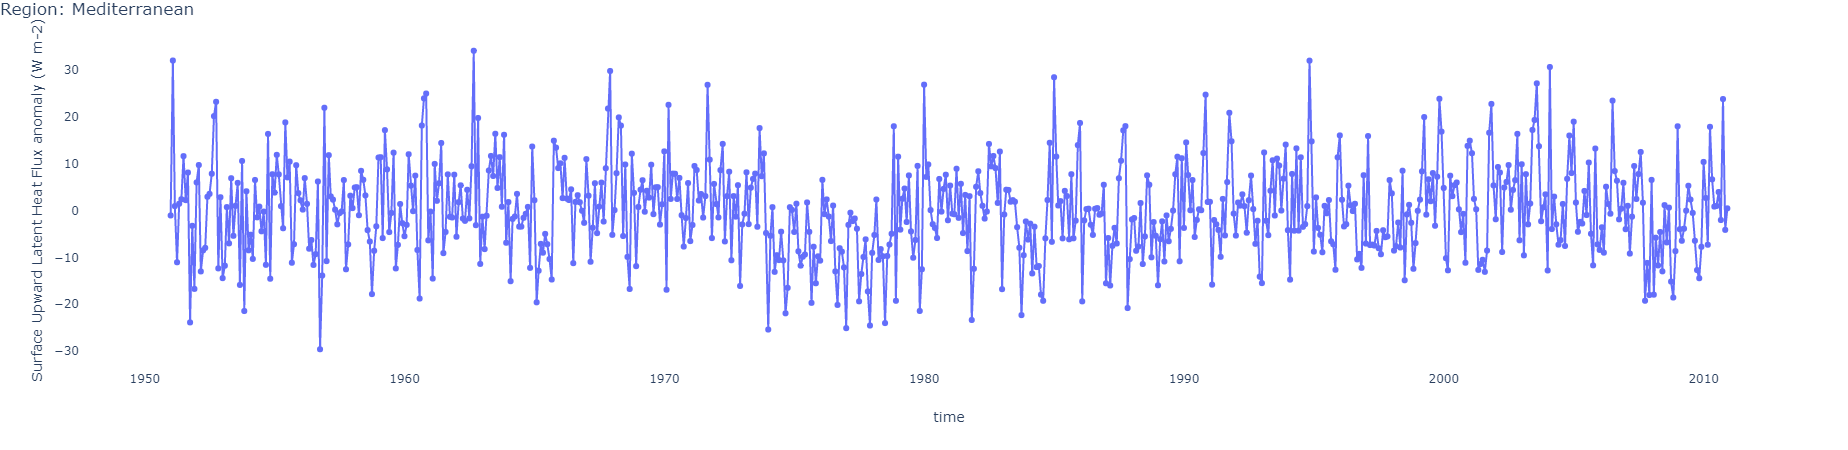

In [14]:

dset = xr.open_dataset('hfls_Amon_GISS-E2-R_amip_r1i1p1_188001-195012.nc')
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 852)
Coordinates:
  * time       (time) object 1880-01-16 12:00:00 ... 1950-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    hfls       (time, lat, lon) float32 ...
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          amip
    source:                 GISS-E2-R-E135OCNf9aF40 Atmosphere: GISS-E2
    model_id:               GISS-E2-R
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes or...
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:           

In [23]:
dset3 = xr.open_dataset('tos_Omon_GISS-E2-R_amip_r1i1p1_195101-201012.nc')
#to be paired with whoever is doing sea surface temperature!
print(dset3)
def generate_plot(date):
    
    fig = plt.figure(figsize=[12,5])

    # 111 means 1 row, 1 col and index 1
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
    
    dset3['tos'].sel(time=date).plot(cmap='jet', 
                                      transform=ccrs.PlateCarree(), robust = True)
    ax.coastlines(color='black', linewidth=2.)


interact_plot = widgets.interact(generate_plot, date = select_date);
                        

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 720)
Coordinates:
  * time       (time) object 1951-01-16 12:00:00 ... 2010-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          amip
    source:                 GISS-E2-R-E135OCNf9aF40 Atmosphere: GISS-E2
    model_id:               GISS-E2-R
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes or...
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:           

interactive(children=(Dropdown(description='Date:', options=(cftime.DatetimeNoLeap(1951, 1, 16, 12, 0, 0, 0), …